# fordgobike-tripdata Exploration
## by: Divya Prasanth

## Preliminary Wrangling

> The fordgobike-tripdata dataset provides information on each bike ride made in the fordgobike program from February 1st, 2019 to March 1st, 2019. It contains information such as starting station details, ending station details, starting time, ending time, duration of the ride and information about the rider such as rider's gender, birth_year, program subscription type for about 183K rides made. There are about 183k rows and 16 columns.
<li>The columns have 2 Datetime variables('start_time', 'end_time')</li>
<li>2 numerical types('duration_sec', 'member_birth_year')</li>
<li>4 geo-location types('start_station_latitude', 'start_station_longitude', 'end_staion_latitude', 'end_station_longitude')</li>
<li>5 categorical types('start_station_id', 'end_station_id', 'bike_id', 'user_type', 'member_gender')</li>
<li>2 object types('start_station_name', 'end_station_name')</li>
<li>1 boolean type('bike_share_for_all_trip). The boolean type variable is 'bike_share_for_all_trip' which denotes whether the rider is enrolled in the "bike_share_for_all" program for low income households.</li>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#loading dataset into pandas dataframe
df = pd.read_csv('data/201902-fordgobike-tripdata.csv')

In [3]:
#overview of data shape, structure and composition
print(df.shape)
print(df.dtypes)
df.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
#descriptive statistics for numerical variables
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [5]:
#looking at the time range in which data was collected
df.start_time.min(), df.end_time.max()

('2019-02-01 00:00:20.6360', '2019-03-01 08:01:55.9750')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Observations
- From the statistics above, we could see that there are some outliers present in duration_sec.
- member_birth_year's count shows there are some missing records

#### From the visual assessment done, we could add the following to the observations to the above
- start_time and end_time are of object data type
- day, month and year contained in a single variable
- start_station_id, end_station_id, bike_id, user_type, member_gender are not categorical data type
- each rider's birth year is given and not age

#### Net Observations
- From the statistics above, we could see that there are some outliers present in duration_sec
- member_birth_year's count shows there are some missing records
- start_time and end_time are of object data type
- day, month and year contained in a single variable
- start_station_id, end_station_id, bike_id, user_type, member_gender are not categorical data type
- duration is provided in sec
- members's birth year is float

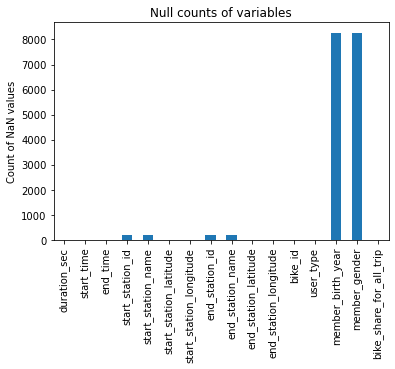

In [7]:
#looking for missing records
df.isna().sum().plot(kind='bar');
plt.title('Null counts of variables');
plt.ylabel('Count of NaN values');

We could see that member_birth_year and member_gender has almost 8k missing values. Lets take a deeper look at the missing values before further proceedings.

In [8]:
# having a closer look at the missing values
df[df.member_birth_year.isnull()].sample(10)

duration_sec                start_time                  end_time  \
40178            702  2019-02-22 21:54:47.3430  2019-02-22 22:06:30.1120   
5268             854  2019-02-28 13:27:04.4400  2019-02-28 13:41:19.0250   
142255           469  2019-02-07 17:16:33.0410  2019-02-07 17:24:22.8750   
115191           812  2019-02-12 08:46:42.8660  2019-02-12 09:00:15.5880   
117438           249  2019-02-11 21:51:36.2580  2019-02-11 21:55:45.7780   
156016           485  2019-02-06 08:21:11.0020  2019-02-06 08:29:16.0410   
144302           250  2019-02-07 12:43:23.9810  2019-02-07 12:47:34.4540   
139908           476  2019-02-07 20:02:40.9580  2019-02-07 20:10:37.8140   
99576            362  2019-02-14 19:38:51.6390  2019-02-14 19:44:54.2360   
131503           850  2019-02-09 12:08:56.7670  2019-02-09 12:23:06.8300   

        start_station_id                                 start_station_name  \
40178                5.0       Powell St BART Station (Market St at 5th St)   
5268                93.0                       4th St at Mission Bay Blvd S   
142255              16.0                            Steuart St at Market St   
115191             105.0                              16th St at Prosper St   
117438              75.0                           Market St at Franklin St   
156016              25.0                                Howard St at 2nd St   
144302             243.0                        Bancroft Way at College Ave   
139908             105.0                              16th St at Prosper St   
99576              324.0                Union Square (Powell St at Post St)   
131503              43.0  San Francisco Public Library (Grove St at Hyde...   

        start_station_latitude  start_station_longitude  end_station_id  \
40178                37.783899              -122.408445            95.0   
5268                 37.770407              -122.391198            77.0   
142255               37.794130              -122.394430            10.0   
115191               37.764285              -122.431804            62.0   
117438               37.773793              -122.421239            77.0   
156016               37.787522              -122.397405            44.0   
144302               37.869360              -122.254337           249.0   
139908               37.764285              -122.431804           140.0   
99576                37.788300              -122.408531           368.0   
131503               37.778768              -122.415929            17.0   

                                         end_station_name  \
40178                               Sanchez St at 15th St   
5268                                 11th St at Natoma St   
142255                         Washington St at Kearny St   
115191                        Victoria Manalo Draves Park   
117438                               11th St at Natoma St   
156016  Civic Center/UN Plaza BART Station (Market St ...   
144302                          Russell St at College Ave   
139908                      Cesar Chavez St at Dolores St   
99576                                Myrtle St at Polk St   
131503   Embarcadero BART Station (Beale St at Market St)   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
40178              37.766219            -122.431060     5481  Subscriber   
5268               37.773507            -122.416040     4999  Subscriber   
142255             37.795393            -122.404770     2230  Subscriber   
115191             37.777791            -122.406432     5383  Subscriber   
117438             37.773507            -122.416040     1225  Subscriber   
156016             37.781074            -122.411738     4794  Subscriber   
144302             37.858473            -122.253253     5075  Subscriber   
139908             37.747858            -122.424986     5162  Subscriber   
99576              37.785434            -122.419622     6447    Customer   
131503             37.792251            -12

Since our analysis is also on rider's age, gender and on station id, let us remove rows that has null as values for these variables. Let us remove these values in the cleaning section.

In [9]:
#checking for duplicates -- must return false
df.duplicated().any()

False

### Cleaning

In [10]:
#creating a copy of the original data frame to clean the dataset
df_clean = df.copy()

#### Define: Remove entries that has null as values for variables 'member_birth_year' and 'start_station_id'

#### Code

In [11]:
#removing entries that has values as null for 'member_birth_year'
df_clean = df_clean[df_clean.member_birth_year.notnull()]

#### Test

In [12]:
# testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [13]:
#removing entries that has values as null for variable 'start_station_id'
df_clean = df_clean[df_clean.start_station_id.notnull()]

#### Test

In [14]:
#Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Define: Convert 'start_time' and 'end_time' variables to datetime variables

#### Code

In [15]:
#converting 'start_time' and 'end_time' to datetime type
df_clean['start_time'] = pd.to_datetime(df['start_time'])
df_clean['end_time'] = pd.to_datetime(df['end_time'])

#### Test

In [16]:
# checking datatype of 'start_time' and 'end_time'
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Define: Convert 'member_birth_year' to int

#### Code

In [17]:
#converting member_birth_year to int
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

#### Test

In [18]:
#testing dtypes
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Define: Split the 'start_time' and 'end_time' variables into corresponding day, dayofweek, hour variables for further analysis

#### Code

In [19]:
#extract day, dayofweek, from the 'start_time' datetime object
df_clean['start_day'] = df_clean['start_time'].dt.day
df_clean['start_dayofweek'] = df_clean['start_time'].dt.dayofweek
df_clean['start_hour'] = df_clean['start_time'].dt.hour

#### Test

In [20]:
#checking randomly if extraction is proper
df_clean.sample(10)[['start_time', 'start_day','start_dayofweek', 'start_hour']]

start_time  start_day  start_dayofweek  start_hour
101595 2019-02-14 17:24:21.124         14                3          17
73648  2019-02-19 13:06:49.410         19                1          13
152301 2019-02-06 16:01:00.527          6                2          16
176739 2019-02-02 10:31:25.633          2                5          10
129171 2019-02-10 11:17:42.834         10                6          11
53167  2019-02-21 16:14:31.187         21                3          16
16041  2019-02-27 08:44:53.368         27                2           8
152624 2019-02-06 15:18:07.812          6                2          15
134494 2019-02-08 17:17:03.093          8                4          17
157221 2019-02-06 00:22:43.467          6                2           0

#### Note: dayofweek being 0 for Monday and 6 for Sunday

#### Define: Convert 'start_station_id', 'end_station_id', 'bike_id', 'user_type', 'member_gender', 'dayofweek' to categorical variables

#### Code

In [21]:
# converting necessary variables into categorical data type
for var in ['start_station_id', 'end_station_id', 'bike_id', 'user_type', 'member_gender',\
            'start_dayofweek']:
    df_clean[var] = df_clean[var].astype('category')

#### Test

In [22]:
#checking variable types
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                 category
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                   category
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                          category
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
start_day                           int64
start_dayofweek                  category
start_hour                          int64
dtype: object

#### Define: using 'member_birth_year' calculate the current age of each member

#### Code

In [23]:
#calculating age
df_clean['age'] = datetime.today().year - df_clean['member_birth_year']

#### Test

In [24]:
#checking 'age' randomly
df_clean[['member_birth_year', 'age']].sample(15)

member_birth_year  age
18814                1990   31
176786               1988   33
111124               1980   41
42963                1991   30
75360                1984   37
132747               1998   23
116749               1994   27
94914                1981   40
169981               1985   36
83038                1983   38
98432                1983   38
104799               1978   43
89193                1988   33
74207                1956   65
80772                1988   33

In [25]:
#let us add a column called duration_min which is time duration in minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  category      
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  category      
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  category      
 12  user_type       

In [27]:
df_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   
5             93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   
5               37.770407              -122.391198          323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   
5                            Broadway at Kearny             37.798014  ...   

   bike_id   user_type member_birth_year  member_gender  \
0     4902    Customer              1984           Male   
2     5905    Customer              1972           Male   
3     6638  Subscriber              1989          Other   
4     4898  Subscriber              1974           Male   
5     5200  Subscriber              1959           Male   

  bike_share_for_all_trip start_day  start_dayofweek start_hour  age  \
0                      No        28                3         17   37   
2                      No        28                3         12   49   
3                      No        28                3         17   32   
4                     Yes        28                3         23   47   
5                      No        28                3         23   62   

   duration_min  
0    869.750000  
2   1030.900000  
3    608.166667  
4     26.416667  
5     29.883333  

[5 rows x 21 columns]

### What is the structure of your dataset?

> After priliminary data wrangling, the dataset got reduced to 174.9K from 183.4K. The dataset originally contained 16 features out of which 12 features are of variables of interest.

### What is/are the main feature(s) of interest in your dataset?

> I am mainly interested in 'duration_sec' and how the bike ride duration is associated with other features such as member's age, user_type, member's gender, day of month, day of week and hour of day  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe, member's age, gender, user_type, start_day, start_dayofweek, start_hour will help the investigation.

## Univariate Exploration

#### Univariate exploration: 'duration_sec'

In [28]:
#plotting histogram distribution of duration in mins
def plot_hist_duration(bins=[]):
    '''
    A function to plot the histogram of the 'duration_mins'
    '''
    plt.figure(figsize=[8, 5])
    if len(bins) == 0:
        bin_size = 5
        bins = np.arange(df_clean.duration_min.min(), df_clean.duration_min.max()+bin_size, bin_size)
    plt.hist(data=df_clean, x='duration_min', bins=bins)
    plt.xlabel('Duration (min)');

plot_hist_duration();
plt.title('Histogram Distribution of Duration in mins');
plt.ylabel('Count');

The axes limits suggest that there are some extreme values present in the distribution. Let us take a deeper look at the distribution by setting the x-axis limits

In [29]:
plot_hist_duration()
plt.xlim(0, 100);
plt.title('Histogram Distribution of Duration in mins');
plt.ylabel('Count');

There's a long tail in the distribution. Hence let us plot the distribution on a log scale for deeper insights.

In [30]:
np.log(df_clean.duration_min.describe())

count    12.072267
mean      2.462438
std       3.309451
min       0.016529
25%       1.683308
50%       2.140066
75%       2.576422
max       7.250730
Name: duration_min, dtype: float64

In [31]:
#plotting the distribution on a log scale
plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(0, np.log10(df_clean.duration_min.max())+0.05, .05)
plt.hist(data=df_clean, x='duration_min', bins=bins)
plt.xscale('log')
x_ticks = [1, 2, 5, 8, 10, 20, 50, 80, 100, 200, 500, 800, 1e3, 2e3, 5e3, 8e3, 1e4, 2e4, 5e4, 8e4]
x_labels = ['1', '2', '5', '8', '10', '20', '50', '80', '100', '200', '500', '800', '1k', '2k', '5k', '8k', '10k',\
            '20k', '50k', '80k']
plt.xticks(x_ticks, x_labels, rotation=90)
plt.xlabel('Duration (min)')
plt.axvline(9, c='r')
plt.title('Histogram Distribution of Duration in mins on a log scale');
plt.ylabel('Count');

With 'duration_min' plotted on log scale, the distribution looks normal with peak ocurring around 9 minutes. The axis limit shows that there are extreme values upto 80k minutes.

In [32]:
#violing plot to detect outliers in duration_min
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
sb.violinplot(data=df_clean, y='duration_min')
plt.title('Violin plot of Duration in mins With outliers')
plt.xlabel('Duration in mins')

plt.subplot(2,2,2)
sb.boxplot(data=df_clean, y='duration_min');
plt.title('Box plot of Duration in mins With Outliers')
plt.xlabel('Duration in mins')

plt.subplot(2,2,3)
sb.violinplot(data=df_clean, y='duration_min')
plt.title('Violin plot of Duration in mins Without outliers')
plt.ylim(-5,70)
plt.xlabel('Duration in mins')

plt.subplot(2,2,4)
sb.boxplot(data=df_clean, y='duration_min');
plt.title('Box plot of Duration in mins Without Outliers')
plt.ylim(-5,70)
plt.xlabel('Duration in mins');

It looks like most of the rides are in the range of 0 to 50 mins. Hence to keep this analysis simple, let us consider entries which has duration_min greater than 50mins as outliers/extreme values.

In [33]:
# creating two datasets one for data in the range 0 to 50 mins and other only for data having duration above 50 mins
df_normal = df_clean.query('duration_min <= 50')

In [34]:
# high level overview of normal data
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173028 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173028 non-null  int64         
 1   start_time               173028 non-null  datetime64[ns]
 2   end_time                 173028 non-null  datetime64[ns]
 3   start_station_id         173028 non-null  category      
 4   start_station_name       173028 non-null  object        
 5   start_station_latitude   173028 non-null  float64       
 6   start_station_longitude  173028 non-null  float64       
 7   end_station_id           173028 non-null  category      
 8   end_station_name         173028 non-null  object        
 9   end_station_latitude     173028 non-null  float64       
 10  end_station_longitude    173028 non-null  float64       
 11  bike_id                  173028 non-null  category      
 12  user_type       

In [35]:
# creating dataset for extreme values
df_extreme = df_clean.query('duration_min > 50')

In [36]:
# high level overview of df_extreme
df_extreme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 183326
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             1924 non-null   int64         
 1   start_time               1924 non-null   datetime64[ns]
 2   end_time                 1924 non-null   datetime64[ns]
 3   start_station_id         1924 non-null   category      
 4   start_station_name       1924 non-null   object        
 5   start_station_latitude   1924 non-null   float64       
 6   start_station_longitude  1924 non-null   float64       
 7   end_station_id           1924 non-null   category      
 8   end_station_name         1924 non-null   object        
 9   end_station_latitude     1924 non-null   float64       
 10  end_station_longitude    1924 non-null   float64       
 11  bike_id                  1924 non-null   category      
 12  user_type                1924 no

#### Univariate exploration: member's age

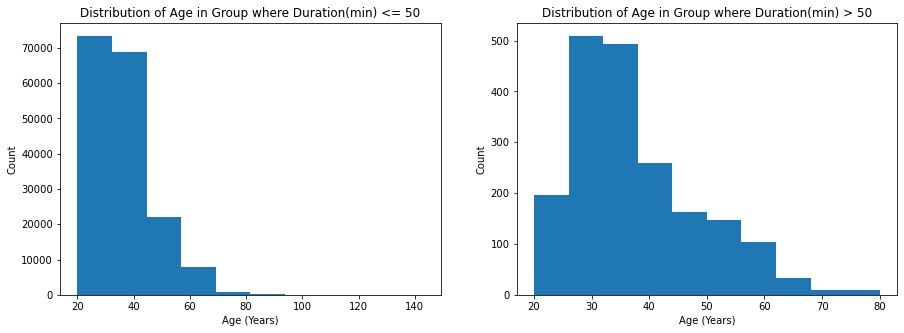

In [37]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.hist(df_normal['age']);
plt.xlabel('Age (Years)')
plt.title('Distribution of Age in Group where Duration(min) <= 50')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(df_extreme['age']);
plt.xlabel('Age (Years)');
plt.title('Distribution of Age in Group where Duration(min) > 50')
plt.ylabel('Count');

As expected, the age is skewed to the right with majority of the people being in the age group between 20 to 50 years and less people above 50 years

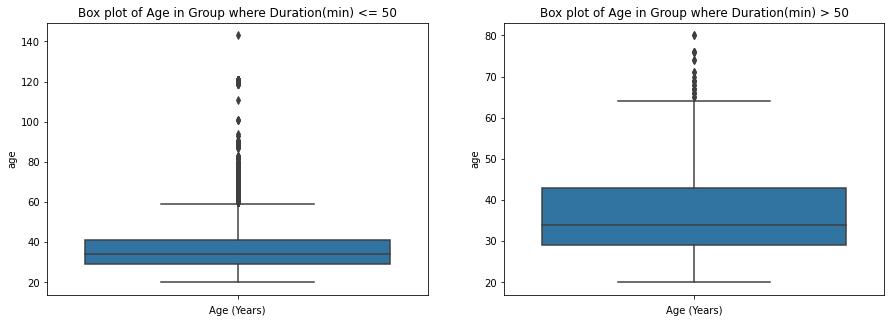

In [38]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.boxplot(data=df_normal, y='age');
plt.xlabel('Age (Years)')
plt.title('Box plot of Age in Group where Duration(min) <= 50')

plt.subplot(1,2,2)
sb.boxplot(data=df_extreme, y='age');
plt.xlabel('Age (Years)');
plt.title('Box plot of Age in Group where Duration(min) > 50');

Two observations can be made from the above plot
<li> The median age for the group(duration > 50 mins) is higher than the median age for the group(duration < 50 mins) </li>
<li> For group normal, age above 100 years is present. This is really odd. Hence let us remove entries that has age greater than 80 years </li>

In [39]:
# removing entreis in df_normal where age is > 80
df_normal = df_normal.query('age <= 80')

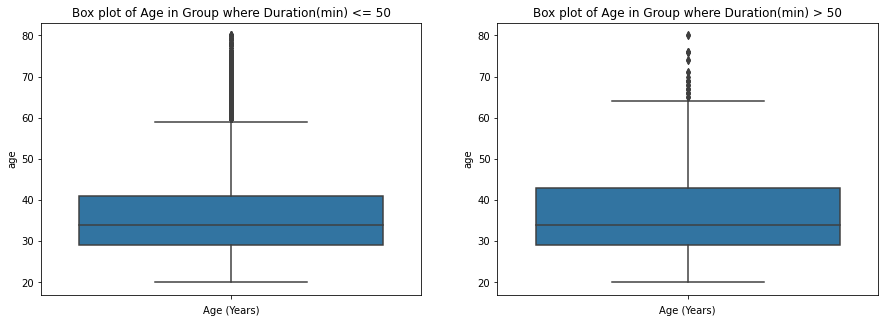

In [40]:
#testing
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.boxplot(data=df_normal, y='age');
plt.xlabel('Age (Years)')
plt.title('Box plot of Age in Group where Duration(min) <= 50')

plt.subplot(1,2,2)
sb.boxplot(data=df_extreme, y='age');
plt.xlabel('Age (Years)');
plt.title('Box plot of Age in Group where Duration(min) > 50');

Okay, so after removing the outliers, the median age group looks similar for both the groups

#### Univariate exploration: User gender

In [41]:
#plotting bar chart for user gender categories
plt.figure(figsize=[15,5])

color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=df_normal, x='member_gender', color=color);
plt.xlabel('Gender')
plt.title('Distribution of Data by Gender in Group where Duration(min) <= 50');

plt.subplot(1,2,2)
sb.countplot(data=df_extreme, x='member_gender', color=color);
plt.xlabel('Gender');
plt.title('Distribution of Data by Gender in Group where Duration(min) > 50');

The above plot shows there are more number of male numbers in both the categories than female numbers

#### Univariate Exploration: User type

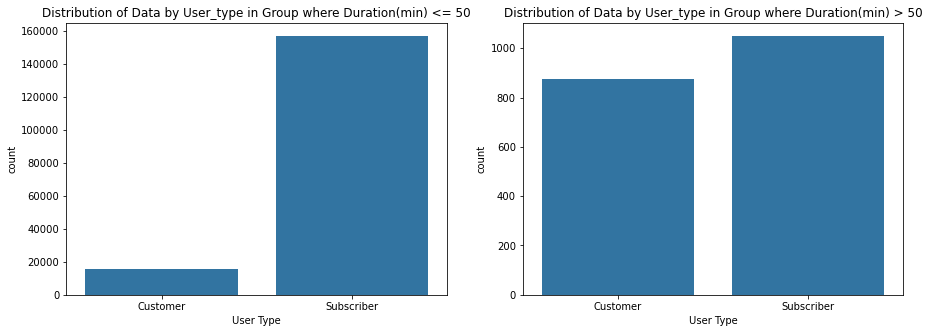

In [42]:
#plotting bar chart for user_type categories
plt.figure(figsize=[15,5])

color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=df_normal, x='user_type', color=color);
plt.xlabel('User Type')
plt.title('Distribution of Data by User_type in Group where Duration(min) <= 50');

plt.subplot(1,2,2)
sb.countplot(data=df_extreme, x='user_type', color=color);
plt.xlabel('User Type');
plt.title('Distribution of Data by User_type in Group where Duration(min) > 50');

It looks like there are very less customer based users than subsriber based users in the group(duration <= 50 mins) and less difference in customers and subsribers in the group(duration > 50)

In [43]:
#plotting bar chart for user_type categories
plt.figure(figsize=[15,5])

color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=df_normal, x='start_dayofweek', color=color);
plt.xlabel('Day of Week (0-Mon to 6-Sun)')
plt.title('Distribution of Data by day_of_week in Group where Duration(min) <= 50');

plt.subplot(1,2,2)
sb.countplot(data=df_extreme, x='start_dayofweek', color=color);
plt.xlabel('Day of Week (0-Mon to 6-Sun)')
plt.title('Distribution of Data by day_of_week in Group where Duration(min) > 50');

As expected, In the group where duration < 50 mins, most of the rides have ocurred in the week days. The reasons might be work and local commutation, etc. For the group where duration > 50 mins, most of the rides have ocurred in the weekends. The reasons I can think of is recreational activities like bike rides, etc

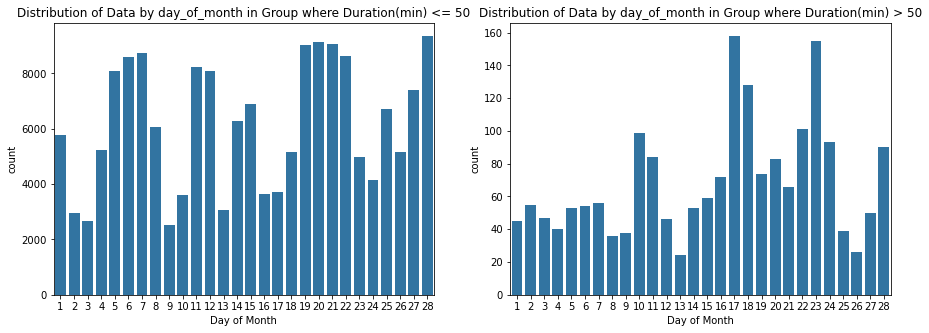

In [44]:
#plotting bar chart by day of month
plt.figure(figsize=[15,5])

color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=df_normal, x='start_day', color=color);
plt.xlabel('Day of Month')
plt.title('Distribution of Data by day_of_month in Group where Duration(min) <= 50');

plt.subplot(1,2,2)
sb.countplot(data=df_extreme, x='start_day', color=color);
plt.xlabel('Day of Month')
plt.title('Distribution of Data by day_of_month in Group where Duration(min) > 50');

The above shows that most number of rides ocurred in 28th in the normal group and on 17th in the extreme group

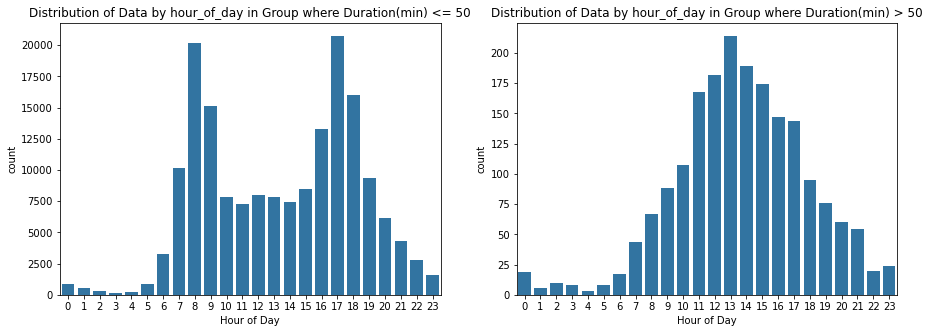

In [45]:
#plotting bar chart by hour of day
plt.figure(figsize=[15,5])

color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=df_normal, x='start_hour', color=color);
plt.xlabel('Hour of Day')
plt.title('Distribution of Data by hour_of_day in Group where Duration(min) <= 50');

plt.subplot(1,2,2)
sb.countplot(data=df_extreme, x='start_hour', color=color);
plt.xlabel('Hour of Day')
plt.title('Distribution of Data by hour_of_day in Group where Duration(min) > 50');

<li>For the normal group, the distribution looks bimodal. It is clear that most bike rides occur during
morning and evening work commutation peak times</li>
<li>For the extreme group, the distribution looks normal with peak ocurring at 1pm</li>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_min took on a large number of values and had a long tail. Hence I applied log tranformation. Under log transformation, the distribution looked normal with the peak ocurring around 9 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the age feature, a number of extreme values were discovered. For safety, I decided to split the dataframe into two dataframes one with age group under 80 and other with age group above 80 years.

In [46]:
df_normal.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                 category
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                   category
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                          category
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
start_day                           int64
start_dayofweek                  category
start_hour                          int64
age                                 int32
duration_min                      float64
dtype: object

## Bivariate Exploration

To reiterate, our variables of interest are:
<ol>
    <li>member's age - numerical</li>
<li>gender - categorical</li>
<li>user_type - categorical</li>
<li>start_dayofweek - categorical</li>
<li>start_hour - numerical</li>
</ol>
We'll only be concentrating on df_normal from now on

In [47]:
#correlation between between age and duration_min
plt.figure(figsize=[8, 5])
sb.regplot(data=df_normal, x='age', y='duration_min', x_jitter=0.3, scatter_kws={'alpha':1/10})
plt.xlabel('Age (years)')
plt.ylabel('Duration (min)');
plt.title('Correlation between Age(years) vs Duration(min)');

The above correlation plot clearly shows there is no or very little correlation exists between member's age and bike ride duration

In [48]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172825 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             172825 non-null  int64         
 1   start_time               172825 non-null  datetime64[ns]
 2   end_time                 172825 non-null  datetime64[ns]
 3   start_station_id         172825 non-null  category      
 4   start_station_name       172825 non-null  object        
 5   start_station_latitude   172825 non-null  float64       
 6   start_station_longitude  172825 non-null  float64       
 7   end_station_id           172825 non-null  category      
 8   end_station_name         172825 non-null  object        
 9   end_station_latitude     172825 non-null  float64       
 10  end_station_longitude    172825 non-null  float64       
 11  bike_id                  172825 non-null  category      
 12  user_type       

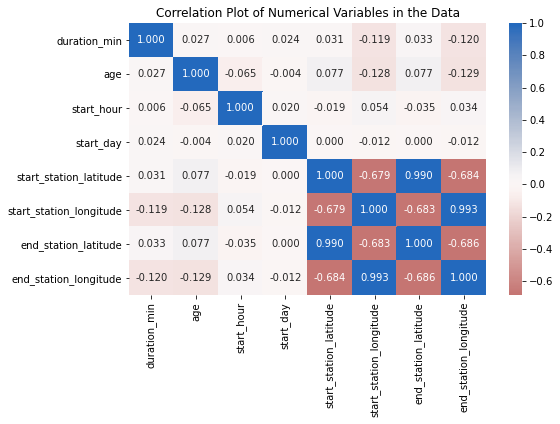

In [49]:
#correlation plot
net_numerical_vars = ['duration_min', 'age', 'start_hour', 'start_day', 'start_station_latitude',\
                      'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

plt.figure(figsize=[8, 5])
sb.heatmap(df_normal[net_numerical_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.title('Correlation Plot of Numerical Variables in the Data');

As depicted above none of the variables have a strong relationship with duration_min

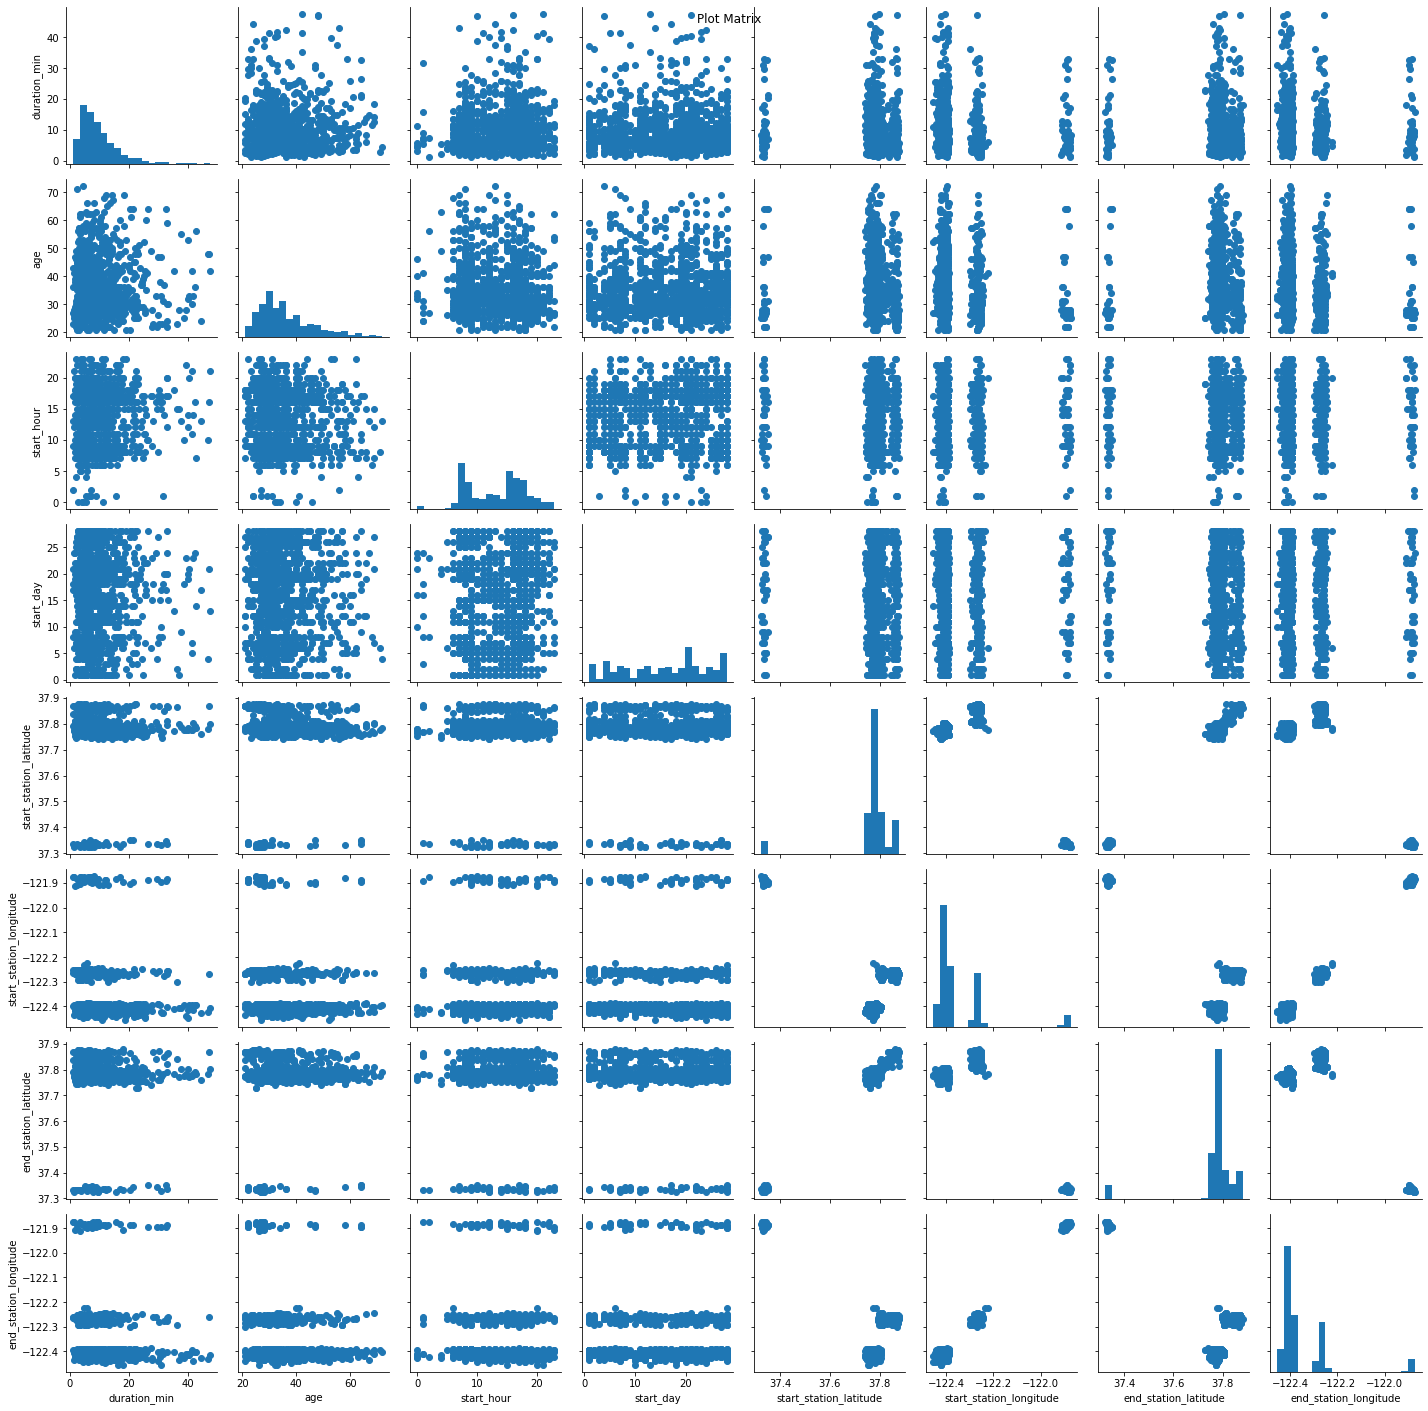

In [50]:
# plot matrix: sample 1000 ride entries so that plots are clearer and render faster
sample = df_normal.sample(1000)

g = sb.PairGrid(data=sample, vars=net_numerical_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);
plt.suptitle('Plot Matrix');

As depicted in the above grid, there exists a correlation between (start_station_latitude vs start_station_longitude) and
(end_station_latitude vs end_station_longitude)

I expected a strong correlation between age and duration, but that is not really the case.

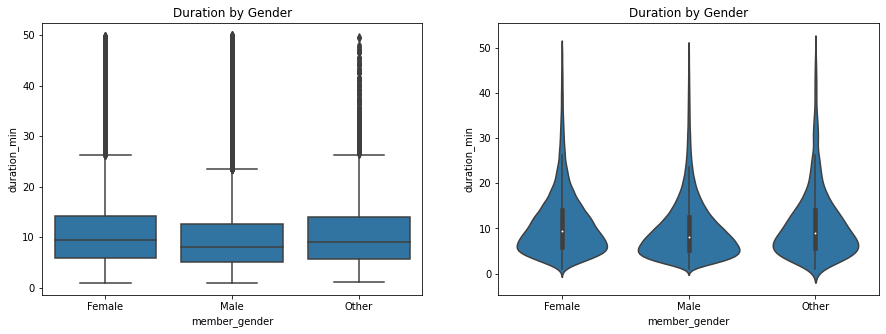

In [51]:
# plot between duration_min vs member_gender
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sb.boxplot(data=df_normal, x='member_gender', y='duration_min', color=color)
plt.title('Duration by Gender')

plt.subplot(1,2,2)
sb.violinplot(data=df_normal, x='member_gender', y='duration_min', color=color);
plt.title('Duration by Gender');

The above plot looks normal with peak for all the three categories occurring in the range 6-9 mins. It looks like female category have greater median duration than male category and other category. Let us try to see how the distribution is between duration vs user_type

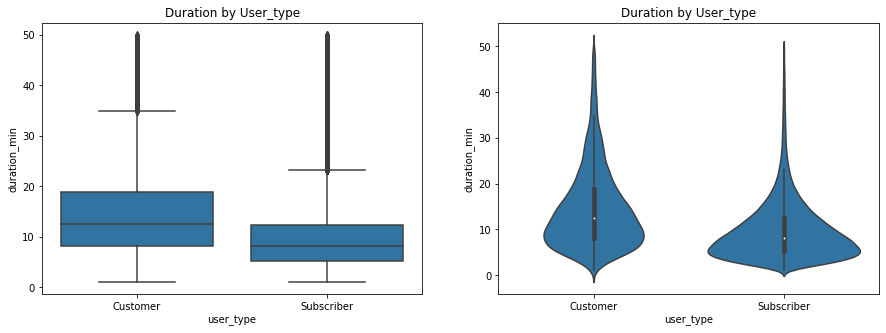

In [52]:
# plot between duration_min vs user_type
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sb.boxplot(data=df_normal, x='user_type', y='duration_min', color=color);
plt.title('Duration by User_type');

plt.subplot(1,2,2)
sb.violinplot(data=df_normal, x='user_type', y='duration_min', color=color);
plt.title('Duration by User_type');

The box plot shows that customer based users have a greater median duration than the subscriber based users. However the violin plot shows that more number of users use median duration ride than the customer based users.

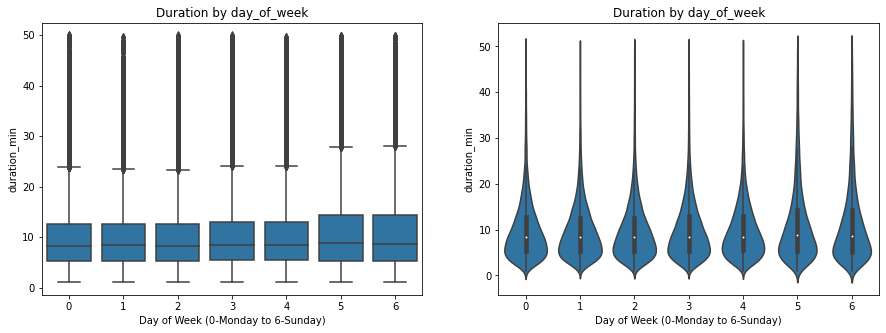

In [53]:
# plot between duration_min vs dayofweek
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sb.boxplot(data=df_normal, x='start_dayofweek', y='duration_min', color=color);
plt.xlabel('Day of Week (0-Monday to 6-Sunday)')
plt.title('Duration by day_of_week');

plt.subplot(1,2,2)
sb.violinplot(data=df_normal, x='start_dayofweek', y='duration_min', color=color)
plt.xlabel('Day of Week (0-Monday to 6-Sunday)');
plt.title('Duration by day_of_week');

While distribution remains normal with the peak ocurring in the range(5-7) mins, the box plot shows that the median duration increases through the week from Monday to Sunday. Let's see next how the distribution varies across hour of the day

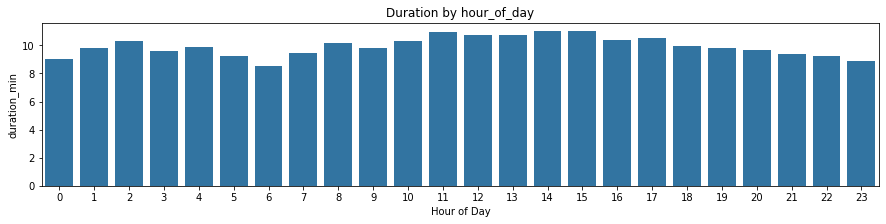

In [54]:
# plot between duration_min vs hour of day
plt.figure(figsize=[15,3])
sb.barplot(data=df_normal, x='start_hour', y='duration_min', color=color, ci=0);
plt.xlabel('Hour of Day');
plt.title('Duration by hour_of_day');

The above bar plot suggests that the distribution is multimodal with peaks ocurring at 2am, 8am, 11am, 4pm of the day. Unsuprisingly these are the peak hours of work commutation.

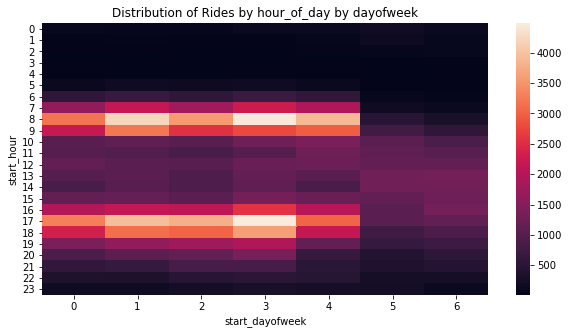

In [55]:
#lets plot now distribution of dayofweek vs hourofday
# using groupby and size to get the combination of two variable levels as pandas series
counts = df_normal.groupby(['start_dayofweek','start_hour']).size()

#using reset_index to convert the pandas series to a dataframe
counts = counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
counts = counts.pivot(index = 'start_hour', columns = 'start_dayofweek', values = 'count')

#plotting heatmap
plt.figure(figsize=[10,5])
sb.heatmap(counts);
plt.title('Distribution of Rides by hour_of_day by dayofweek');

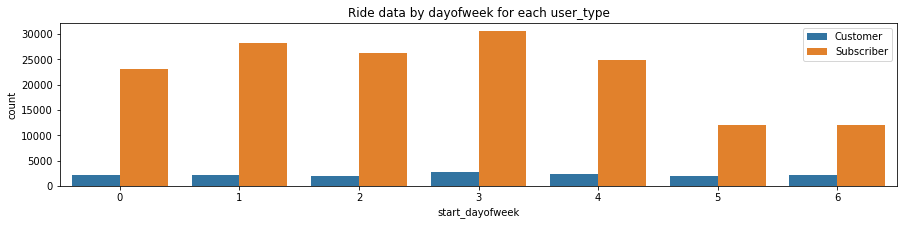

In [56]:
#lets plot now distribution of dayofweek vs usertype
plt.figure(figsize=[15,3])
sb.countplot(data=df_normal, x='start_dayofweek', hue='user_type');
plt.title('Ride data by dayofweek for each user_type');
plt.legend(loc='upper right');

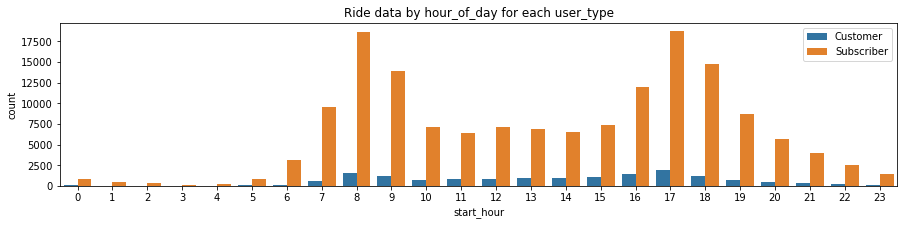

In [57]:
#lets plot now distribution of dayofweek vs usertype
plt.figure(figsize=[15,3])
sb.countplot(data=df_normal, x='start_hour', hue='user_type');
plt.title('Ride data by hour_of_day for each user_type');
plt.legend(loc='upper right');

The above heatmap clear states that more number of rides happen during the weekdays at peak hours like 8-9am and 5-6pm.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I expected a strong correlation between duration and age, but the investigation showed there exists no correlation between age and duration. While certainly there is large number of male users than female and other users, the female median ride duration stands higher than the other categories. Customer type users intend to have more median travel duration than subscriber type users. Time duration during weekends tend to have more median duration than the weekdays. istribution is multimodal with peaks ocurring at 2am, 8am, 11am, 4pm of the day. Unsuprisingly these are the peak hours of work commutation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Across week days, the bike rides peak at 8 to 9 am and 4 to 5pm. Interestingly this does not happen in the weekends. Though the number of subscribers making rides is higher, the customer intends to have high median duration. However this needs further analysis which can done via multivariate exploration

## Multivariate Exploration

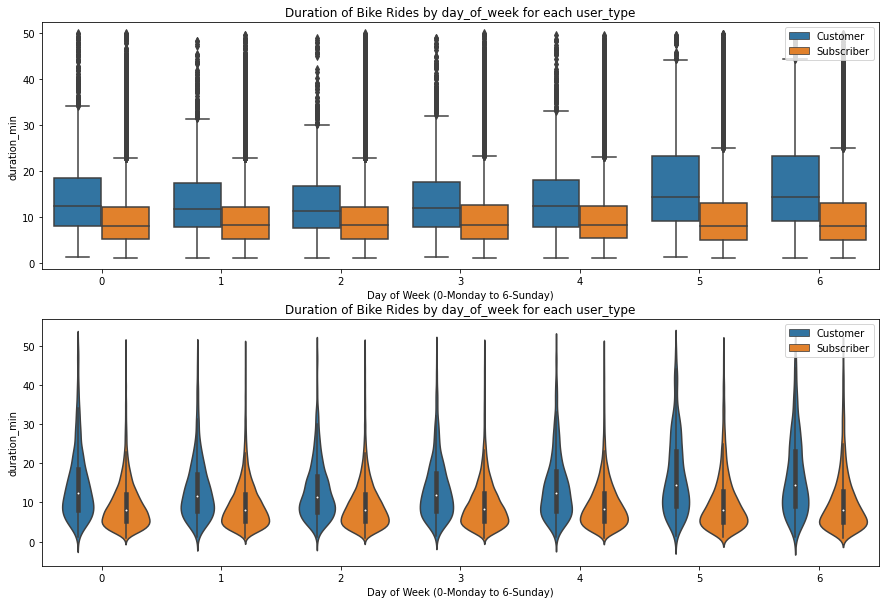

In [58]:
# plot between duration_min vs dayofweek vs user_type
plt.figure(figsize=[15,10])
plt.subplot(2,1,1)
sb.boxplot(data=df_normal, x='start_dayofweek', y='duration_min',hue='user_type');
plt.xlabel('Day of Week (0-Monday to 6-Sunday)')
plt.title('Duration of Bike Rides by day_of_week for each user_type')
plt.legend(loc='upper right');

plt.subplot(2,1,2)
sb.violinplot(data=df_normal, x='start_dayofweek', y='duration_min', hue='user_type')
plt.xlabel('Day of Week (0-Monday to 6-Sunday)');
plt.title('Duration of Bike Rides by day_of_week for each user_type');
plt.legend(loc='upper right');

Though the subscribers are in large numbers than the customers, however the customers tend to travel longer than the subscribers both during the weekend and during the weekdays. During the weekends customers intend to travel a lot more than during the weekdays.

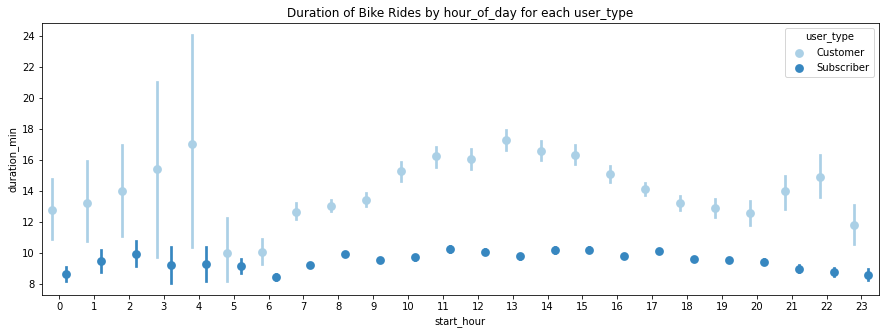

In [59]:
#plot between duration_min vs 
plt.figure(figsize=[15,5])
plt.title('Duration of Bike Rides by hour_of_day for each user_type')
sb.pointplot(data=df_normal, x='start_hour', y='duration_min',hue='user_type', palette = 'Blues', linestyles = '', dodge = 0.4);

The above plot adds evidence to our finding that customer intend to travel more than subscribers during weekdays and weekends

In [60]:
df_normal.user_type.value_counts()

Subscriber    157146
Customer       15679
Name: user_type, dtype: int64

In [61]:
#heatmap plot btw start_dayofweek vs start_hour vs Customer type users
df_normal_customer = df_normal.query('user_type == "Customer"')
counts = df_normal_customer.groupby(['start_dayofweek','start_hour']).size()

#using reset_index to convert the pandas series to a dataframe
counts = counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
counts = counts.pivot(index = 'start_hour', columns = 'start_dayofweek', values = 'count')

#plotting heatmap
plt.figure(figsize=[10,5])
sb.heatmap(counts);
plt.title('Bike Rides by day_of_week by hour_of_day for Customer user type');

In [62]:
#heatmap plot btw start_dayofweek vs start_hour vs Subscriber type users

df_normal_subscriber = df_normal.query('user_type == "Subscriber"')
counts = df_normal_subscriber.groupby(['start_dayofweek','start_hour']).size()

#using reset_index to convert the pandas series to a dataframe
counts = counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
counts = counts.pivot(index = 'start_hour', columns = 'start_dayofweek', values = 'count')

#plotting heatmap
plt.figure(figsize=[10,5])
sb.heatmap(counts);
plt.title('Bike Rides by day_of_week by hour_of_day for Subscriber user type');

While the above plot clearly show that the Customer user type intend to ride more in the weekends and the Subscription based user type travel more during the weekdays

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relationship was found one numerical variable(duration_min) and three categorical variables(dayofweek, hourofday and user_type). Subscriber intends to travel more than the customer type user. The customer travels significantly longer during the weekends than the weekdays. The number of susbscribers travelling in the weekdays is larger. During weekdays the peak is seen at 8 to 9 am and at 4 to 5pm which appears to be peak hours of office commuting. 

### Were there any interesting or surprising interactions between features?

> No there were any surprising interactions between features.